# Optimizer Example
MNIST ANN example showing comparison between *newer* optimizers.

Richard Henry, 15-Jul-2024 

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST ANN

Here we are looking at optimizers that appeared *after* Adam.

Adapted from mvsjober on Github.
https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/keras-mnist-mlp.ipynb

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
batch_size = 128
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19) 
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(64, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(myClas, 
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, LION

In [7]:
%%time
h0=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7722 - loss: 0.7306 - val_accuracy: 0.9628 - val_loss: 0.1329
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9322 - loss: 0.2364 - val_accuracy: 0.9665 - val_loss: 0.1291
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9393 - loss: 0.2154 - val_accuracy: 0.9638 - val_loss: 0.1254
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9422 - loss: 0.2001 - val_accuracy: 0.9680 - val_loss: 0.1200
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 0.1899 - val_accuracy: 0.9692 - val_loss: 0.1197
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.1851 - val_accuracy: 0.9713 - val_loss: 0.1062
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9506 - loss: 0.1731 - val_accuracy: 0.9715 - val_loss: 0.1125
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9502 - loss: 0.1778 - val_accuracy: 0.

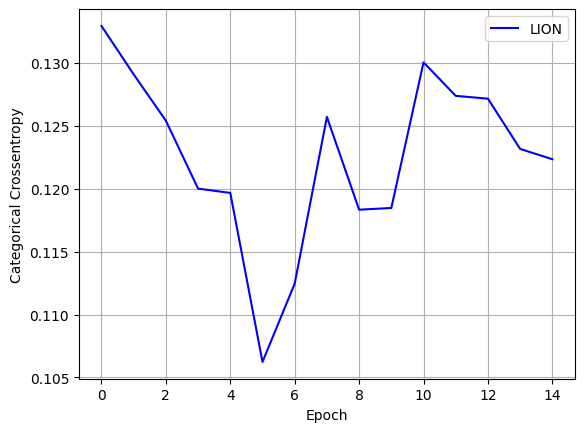

In [8]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

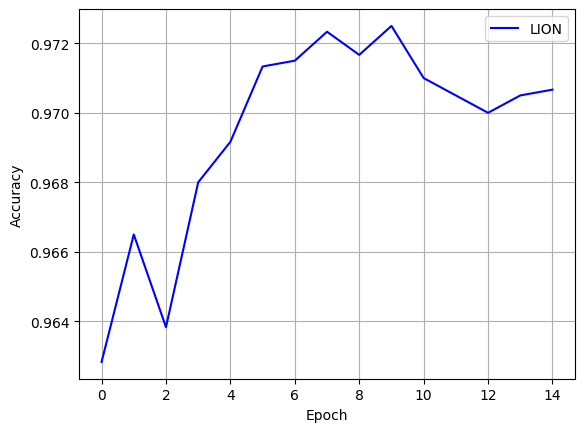

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaFactor

In [10]:
%%time
h1=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3621 - loss: 1.9359 - val_accuracy: 0.8733 - val_loss: 0.6505
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7692 - loss: 0.7638 - val_accuracy: 0.9105 - val_loss: 0.3583
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.5287 - val_accuracy: 0.9253 - val_loss: 0.2825
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.4488 - val_accuracy: 0.9327 - val_loss: 0.2432
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3953 - val_accuracy: 0.9382 - val_loss: 0.2176
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8937 - loss: 0.3601 - val_accuracy: 0.9433 - val_loss: 0.1994
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9005 - loss: 0.3334 - val_accuracy: 0.9478 - val_loss: 0.1838
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9074 - loss: 0.3070 - val_accuracy: 0.

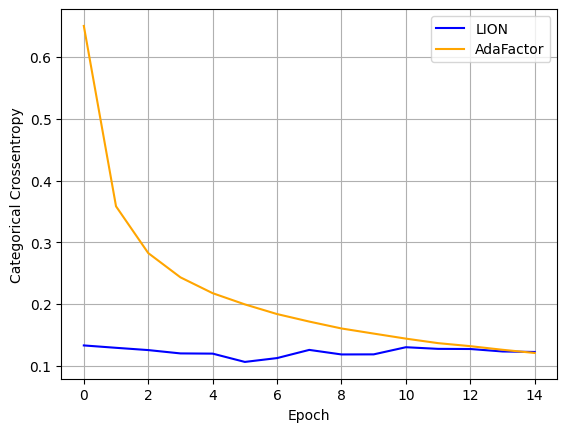

In [11]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

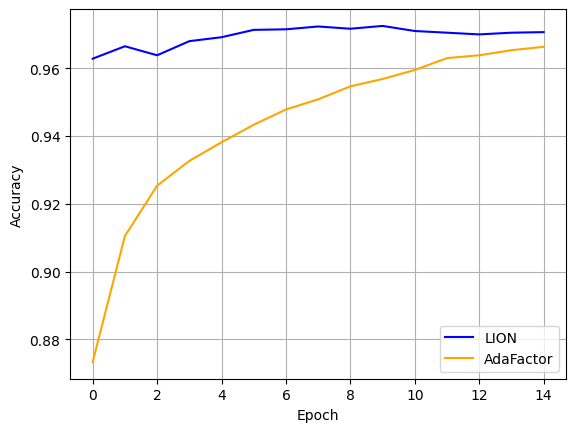

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, Adam + Weight Decay

In [13]:
%%time
h2=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7469 - loss: 0.8217 - val_accuracy: 0.9568 - val_loss: 0.1489
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - loss: 0.2402 - val_accuracy: 0.9685 - val_loss: 0.1046
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9472 - loss: 0.1783 - val_accuracy: 0.9732 - val_loss: 0.0911
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1433 - val_accuracy: 0.9737 - val_loss: 0.0843
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1224 - val_accuracy: 0.9780 - val_loss: 0.0763
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1075 - val_accuracy: 0.9787 - val_loss: 0.0734
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0950 - val_accuracy: 0.9778 - val_loss: 0.0724
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0877 - val_accuracy: 0.

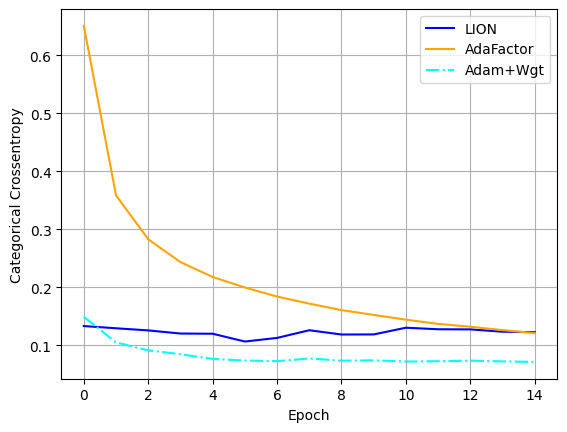

In [14]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

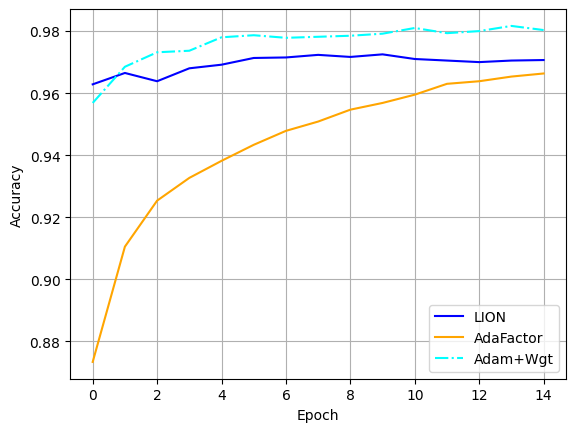

In [15]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'],color='cyan',linestyle='dashdot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### 4th Model, Adam

In [16]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7528 - loss: 0.8093 - val_accuracy: 0.9582 - val_loss: 0.1452
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2273 - val_accuracy: 0.9685 - val_loss: 0.1064
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1737 - val_accuracy: 0.9743 - val_loss: 0.0860
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.1388 - val_accuracy: 0.9757 - val_loss: 0.0798
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1196 - val_accuracy: 0.9778 - val_loss: 0.0759
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1087 - val_accuracy: 0.9765 - val_loss: 0.0690
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0940 - val_accuracy: 0.9772 - val_loss: 0.0682
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0869 - val_accuracy: 0.

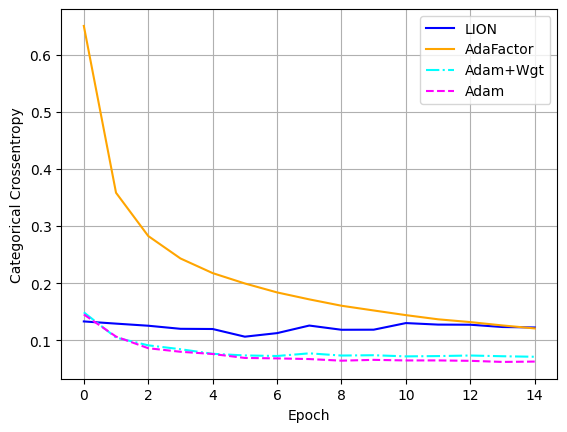

In [17]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

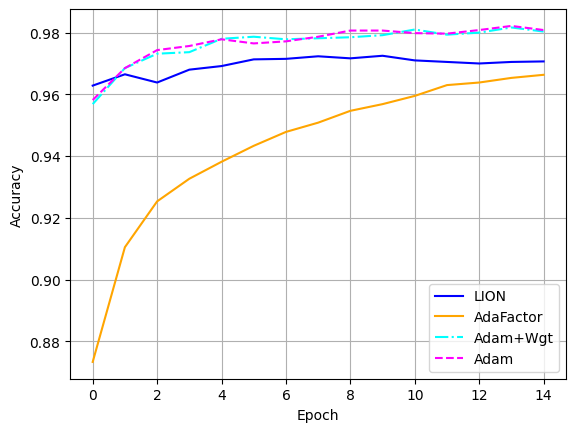

In [18]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

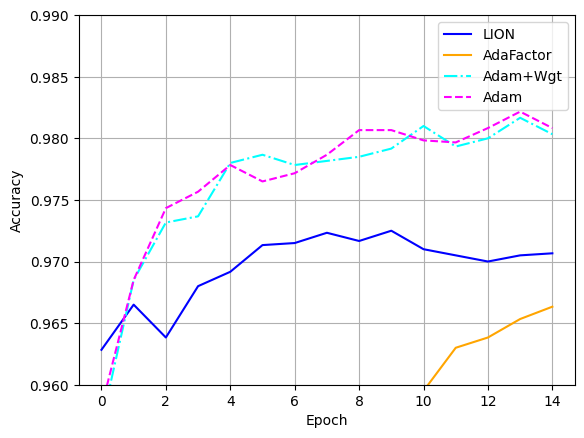

In [19]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.ylim([0.96,0.99])
plt.show()

5th Model, Adam with Nesterov Momentum

In [20]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7437 - loss: 0.8137 - val_accuracy: 0.9583 - val_loss: 0.1475
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9336 - loss: 0.2281 - val_accuracy: 0.9667 - val_loss: 0.1088
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9481 - loss: 0.1701 - val_accuracy: 0.9730 - val_loss: 0.0891
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1377 - val_accuracy: 0.9753 - val_loss: 0.0813
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1209 - val_accuracy: 0.9760 - val_loss: 0.0780
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1053 - val_accuracy: 0.9778 - val_loss: 0.0738
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.0972 - val_accuracy: 0.9777 - val_loss: 0.0716
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0863 - val_accuracy: 0.

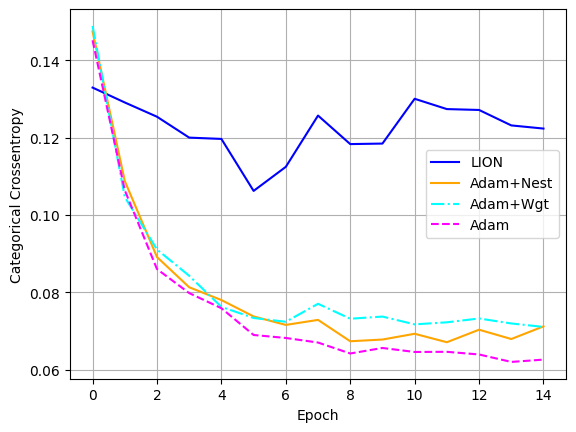

In [21]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h4.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

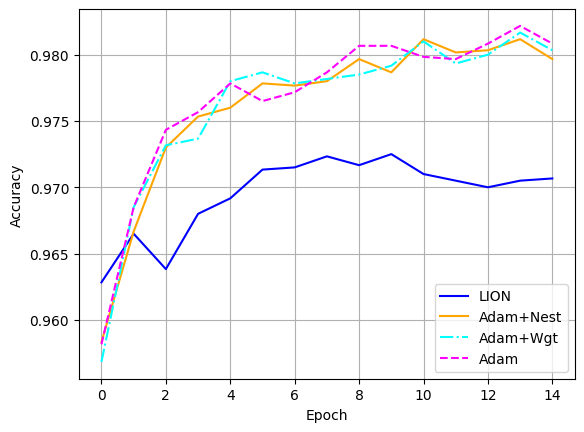

In [22]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

6th Model, Follow the Regularized Leader

In [23]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1141 - loss: 2.3028 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3018 - val_accuracy: 0.

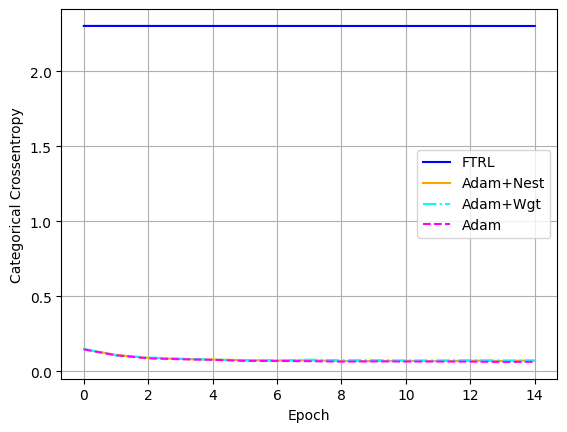

In [24]:
plt.plot(h5.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h4.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['FTRL','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

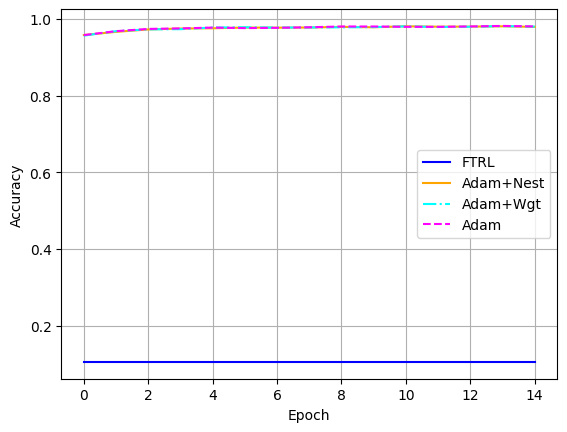

In [25]:
plt.plot(h5.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['FTRL','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

#### Comment
lorem ipsum
# Conclusions
Blah blah blah